## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("day073_da-programming-language-popularity/QueryResults.csv")

Ubah nama kolom di df jadi ['DATE', 'TAG', 'POSTS']

In [3]:
df.columns = ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
df.tail()

,DATE,TAG,POSTS
2728,2024-12-01 00:00:00,php,452
2729,2024-12-01 00:00:00,python,2787
2730,2024-12-01 00:00:00,r,556
2731,2024-12-01 00:00:00,ruby,53
2732,2024-12-01 00:00:00,swift,330


**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count() # outputnya jumlah value non-NaN, jadi kalau ada missing value bisa ketauan juga

,0
DATE,2733
TAG,2733
POSTS,2733


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531611
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2209566
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1918895
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1623274
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1467505
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,812510
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,509940
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,406996
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,335748


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [8]:
df.groupby('TAG').count().sort_values(by='POSTS', ascending=False)

,DATE,POSTS
TAG,,
c#,198,198
assembly,197,197
c,197,197
c++,197,197
delphi,197,197
java,197,197
javascript,197,197
perl,197,197
php,197,197


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [10]:
print(df['DATE'][1])

2008-08-01 00:00:00


In [11]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [12]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
print(f"(jumlah baris, jumlah kolom): {reshaped_df.shape}")

(jumlah baris, jumlah kolom): (198, 14)


In [14]:
# nama kolom reshaped_df
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [15]:
# ngintip 5 data pertama
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,631.0,129.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [16]:
reshaped_df.count()

,0
TAG,
assembly,197
c,197
c#,198
c++,197
delphi,197
go,182
java,197
javascript,197
perl,197


In [17]:
# kita ubah semua nilai NaN di reshaped_df jadi 0. jadi jangan di drop NaN nya.
reshaped_df.fillna(0, inplace=True)

In [19]:
# cek masih ada ga NaN nya
reshaped_df.isna().values.any()

False

## Data Visualisation with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

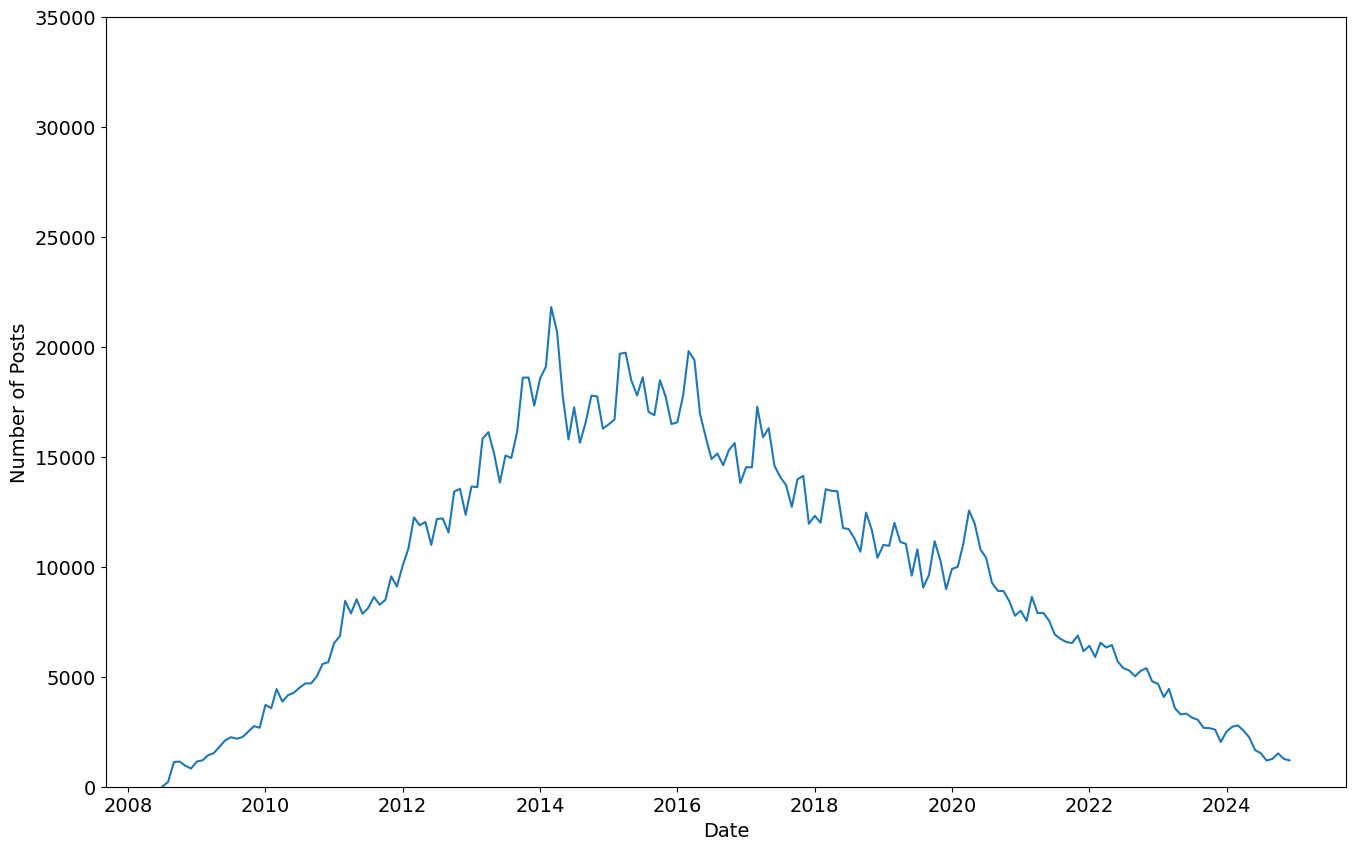

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

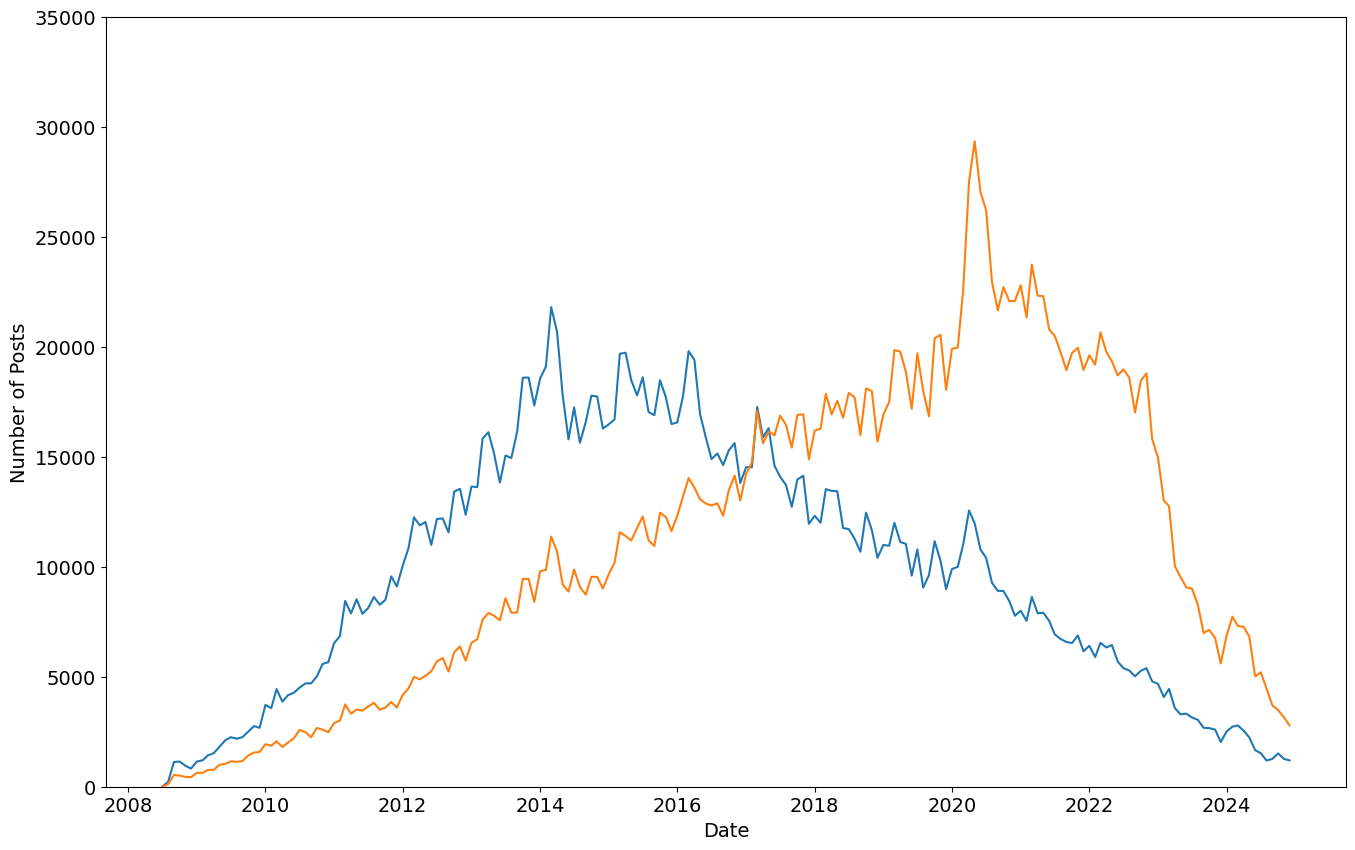

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

plt.show()

Semua language

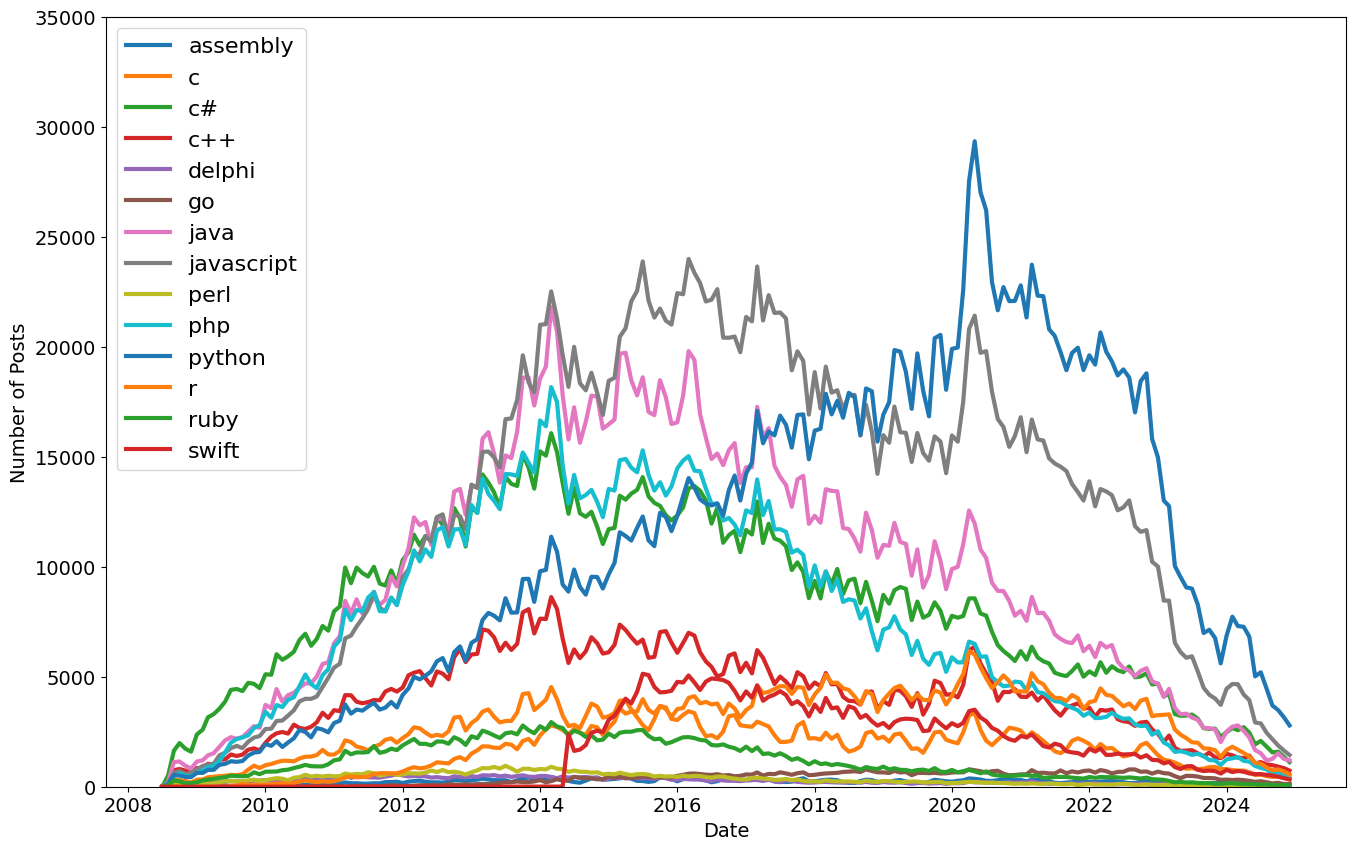

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
           linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

plt.show()

Semenjak ada chatgpt, jumlah post di stackoverflow jadi menurun ._.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

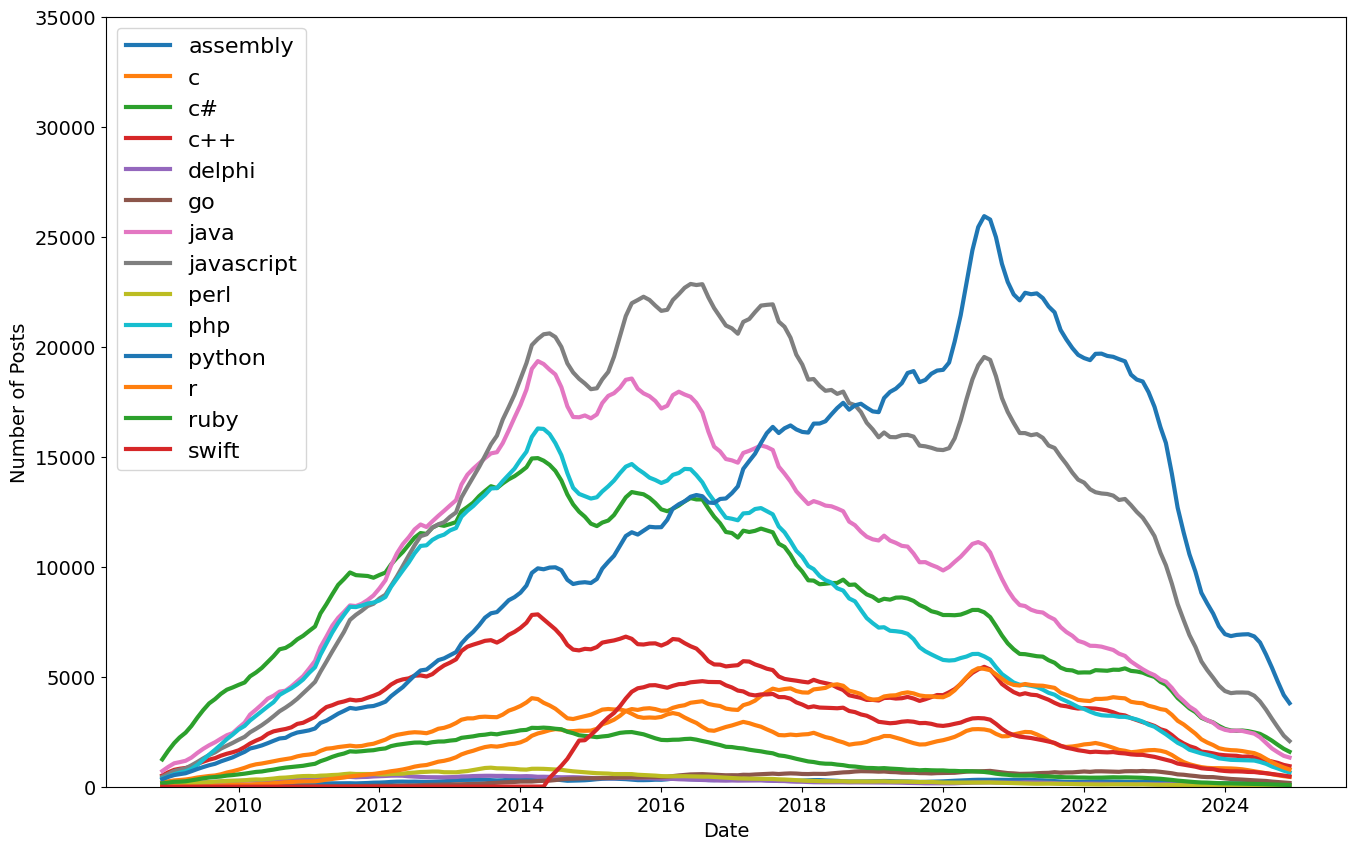

In [31]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

plt.show()

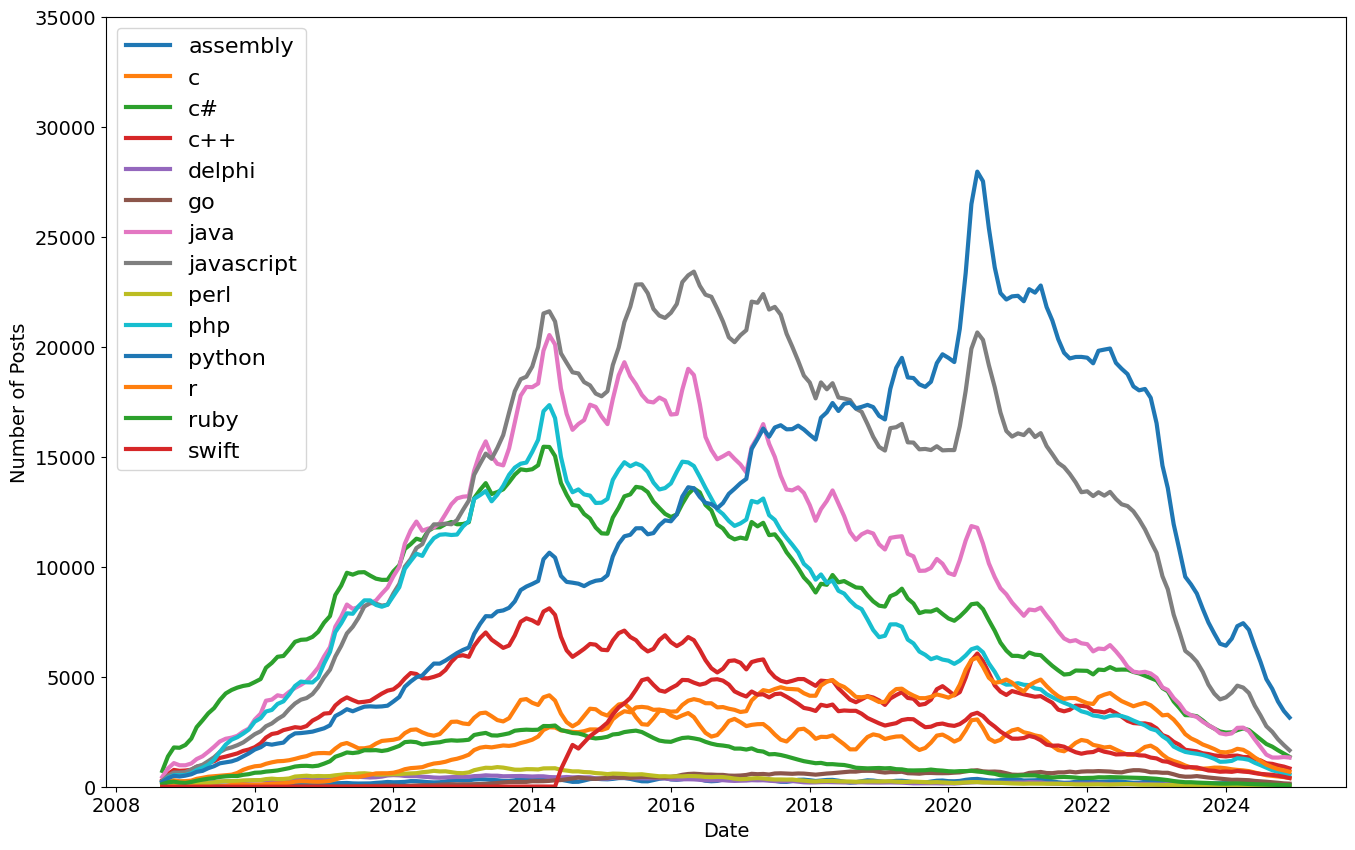

In [32]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

plt.show()

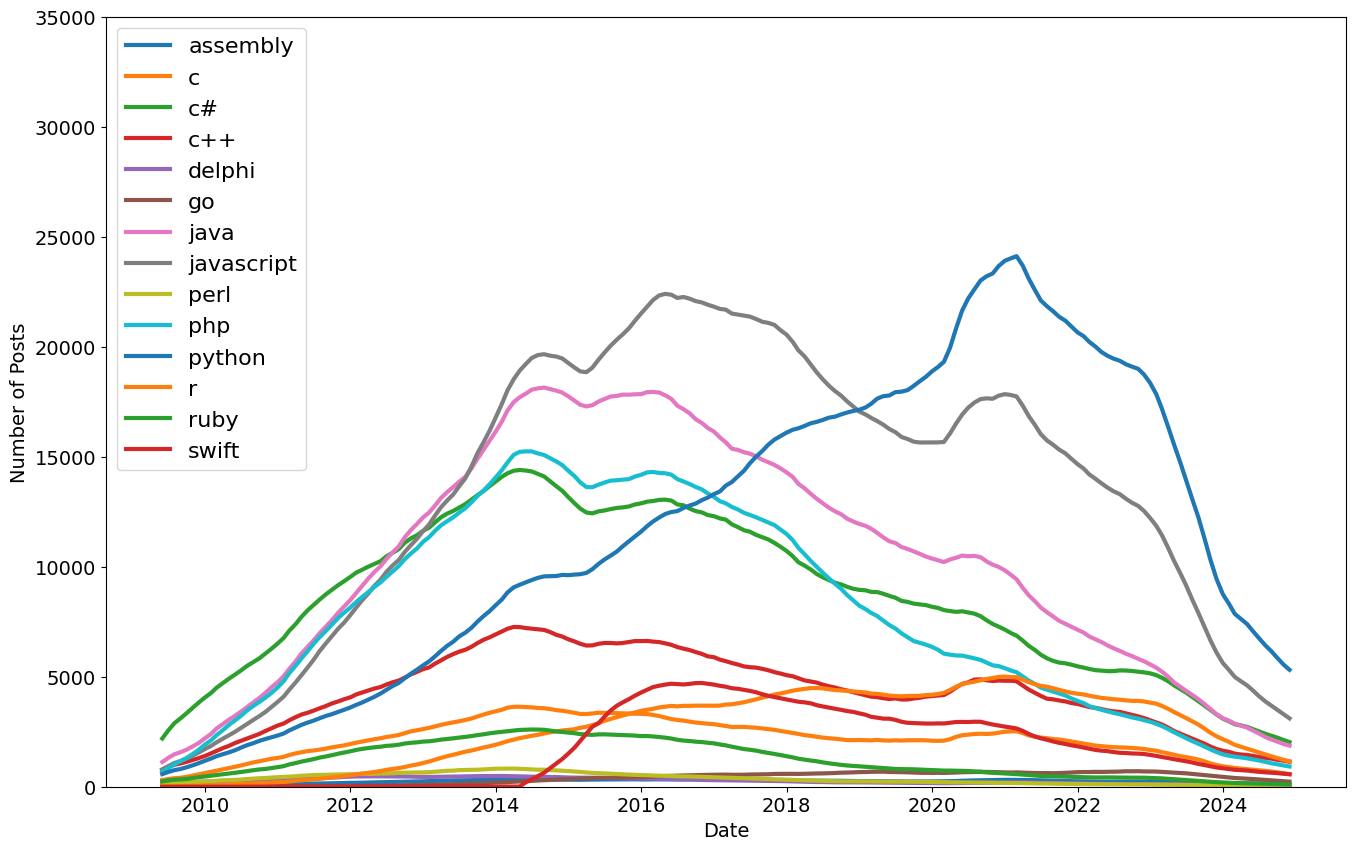

In [33]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

plt.show()